In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\admin\Downloads\salary_data_file.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
data.describe()

,YearsExperience,Salary
count,128.000000,128.000000
mean,16.864062,91452.164062
std,8.228238,20287.637970
min,1.100000,37731.000000
25%,11.050000,78665.250000
50%,17.400000,93586.500000
75%,23.750000,107988.750000
max,30.100000,122391.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1495f931b50>,
 'caps': [<matplotlib.lines.Line2D at 0x1495f94c250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1495f9317f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1495f94c910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1495f94cc70>],
 'means': []}

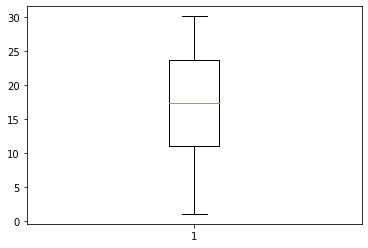

In [5]:
plt.boxplot(data['YearsExperience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1495fa23490>,
 'caps': [<matplotlib.lines.Line2D at 0x1495fa23b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1495fa23190>],
 'medians': [<matplotlib.lines.Line2D at 0x1495fa2e250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1495fa2e5b0>],
 'means': []}

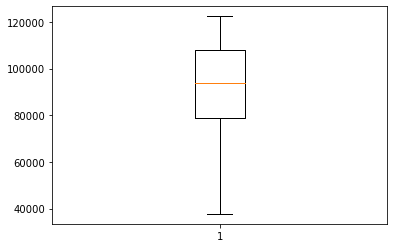

In [6]:
plt.boxplot(data['Salary'])

In [7]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.049948
Salary,0.049948,1.000000


<AxesSubplot:>

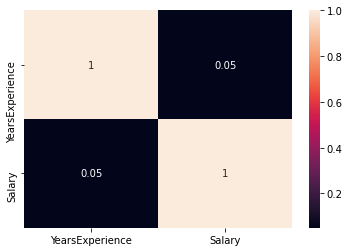

In [8]:
sns.heatmap(data.corr(),annot=True)

In [9]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [10]:
x = data.drop(['Salary'],axis=1)
y = data['Salary']

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
print(x.shape,x_train.shape,x_test.shape)

(128, 1) (89, 1) (39, 1)


In [13]:
from sklearn.preprocessing import StandardScaler
# for standardscaler mean is 0 and sd is 1
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [14]:
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [16]:
model.coef_

array([85.25555088])

In [17]:
#y = mx+c
model.intercept_

91874.97752808989

In [25]:

from math import sqrt
from sklearn.metrics import r2_score,mean_squared_error

In [19]:
print(r2_score(y_train,model.predict(x_train)))

1.8370259859623594e-05


In [20]:
print(r2_score(y_test,model.predict(x_test)))

-0.0031833315729776768


In [21]:
print(sqrt(r2_score(y_train,model.predict(x_train))))

0.004286054113006927


In [22]:
# R2 score ...> range(0-1) > if you get the value around 1 it gives you the high accuracy

### we can check our actual and predicted data

In [30]:
pd.DataFrame({'Actual':y_train,'Predicted':np.round(model.predict(x_train))})

,Actual,Predicted
22,101302,91778.0
44,114087,91837.0
65,103188,91881.0
95,87618,91944.0
30,121353,91807.0
...,...,...
106,81909,91967.0
14,61111,91742.0
92,89175,91937.0
51,110454,91851.0
